# <font color='yellow'> Computer Vision

<font color=yellow> **The objective of this project is twofold: to delve into the study of computer vision while advancing further in the exploration of Jupyter Notebook and Python.**

Several practices will be employed in this study:

1- Below certain commands, there will be a summary of their meanings.

2- All text will be written in English.

3- The data has been extracted from exercises on the Alura platform.

# About

The project aims to harness the capabilities of Optical Character Recognition (OCR) within the realm of computer vision to automatically detect and interpret text on car license plates. OCR technology involves the conversion of various types of documents, such as scanned paper documents, PDFs, or images captured by a camera, into editable and searchable data.

Within the broader field of computer vision, OCR plays a crucial role in extracting meaningful information from images or videos. By leveraging advanced algorithms and machine learning techniques, OCR systems can accurately identify and recognize text patterns within images, regardless of variations in fonts, sizes, or orientations.

In our specific context, we are focusing on license plate recognition, which poses unique challenges due to factors like varying lighting conditions, angles, and distortions. By employing robust OCR techniques, coupled with sophisticated computer vision algorithms, our project aims to develop a solution capable of reliably identifying and extracting license plate numbers from diverse real-world scenarios.

Through the utilization of tools like Tesseract OCR, which is renowned for its accuracy and flexibility, we aim to empower our system to efficiently process and interpret license plate text.

In [1]:
# imports

import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from skimage.segmentation import clear_border

In [2]:
# Function to read on jupyter notebook (To avoid openning new window)

def load_image(img):
    if img is None:
        print('Error loading image')
    else:
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
def load_image_rgb(img):
    if img is None:
        print('Error loading image')
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        
def load_image_gray(img):
    if img is None:
        print('Error loading image')
        return None
    else:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        plt.imshow(img_gray, cmap='gray')
        plt.axis('off')
        plt.show()
        return img_gray

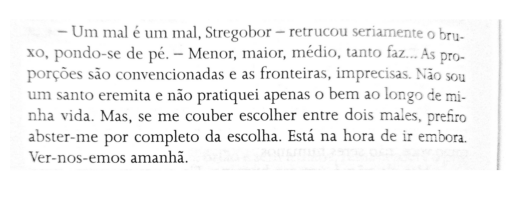

In [3]:
# Checking if open CV is working

image_test = cv2.imread('Dados/Imagem/carros/trecho_livro.png')
load_image(image_test)

In [4]:
# Checking if pytesseract is working

conf_test = r'--psm 6'

text_test = pytesseract.image_to_string(image_test, lang='por', config=conf_test)
print(text_test)

— Um mal é um mal, Stregobor — retrucou seriamente o bru-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. :
Ver-nos-emos amanhã.



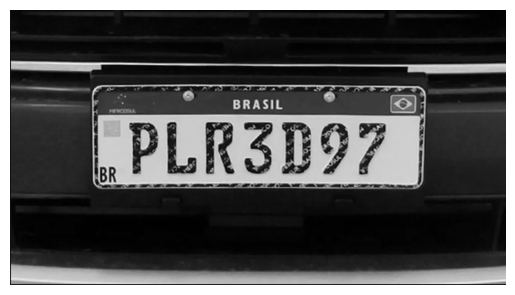

[[ 14  14   2 ...   5   5   5]
 [ 14  14   2 ...   5   5   5]
 [ 14  14   3 ...   5   5   5]
 ...
 [ 14  14 144 ... 122 121 120]
 [ 14  14  14 ...  14  14  14]
 [ 14  14  14 ...  14  14  14]]


In [5]:
# First car plate ( Loading on gray )

image_first_car = cv2.imread('Dados/Imagem/carros/placa_carro1.png')
image_gray = load_image_gray(image_first_car)
print(image_gray)

In [6]:
# Reading plate

text_first_car = pytesseract.image_to_string(image_first_car, lang='por')
print(text_first_car)

# Here we can check that pytesseract cannot read this image.

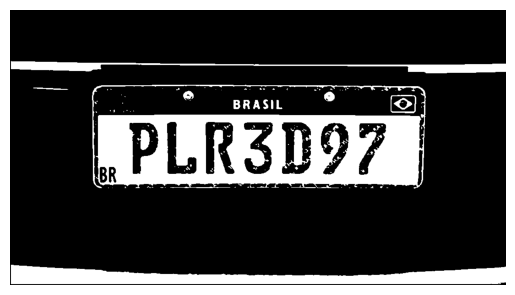

In [7]:
# Global Thresholding

limit = 127

if image_gray is not None:
    value, lim_simple = cv2.threshold(image_gray, limit, 255, cv2.THRESH_BINARY)
    plt.imshow(lim_simple, cmap='gray')
    plt.axis('off')
    plt.show()
    
# In this case we are manually setting the limit, which is not intersting on a scenario with many possibilities of image

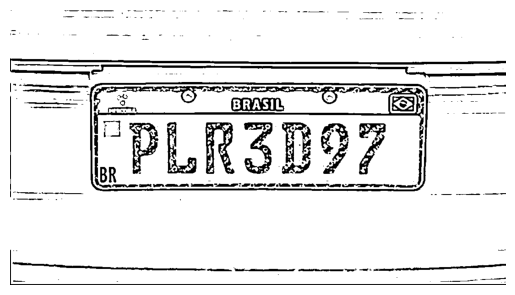

In [8]:
# Adaptive Threshold Mean

if image_gray is not None:
    limp_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
    plt.imshow(limp_adaptive, cmap='gray')
    plt.axis('off')
    plt.show()

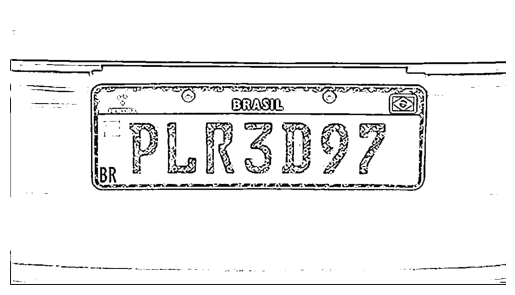

In [9]:
# Adaptive Threshold Gaussian

if image_gray is not None:
    lim_adaptive = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
    plt.imshow(lim_adaptive, cmap='gray')
    plt.axis('off')
    plt.show()

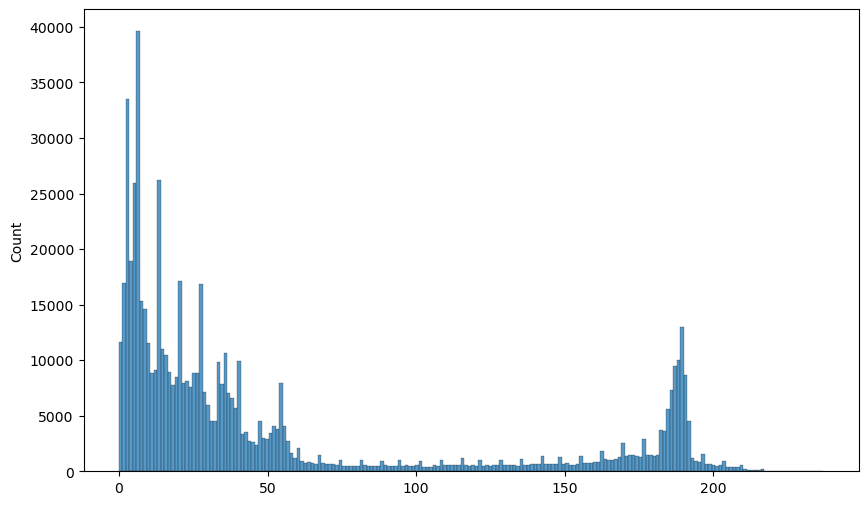

In [10]:
# Applying Otsu

# Transform image in array to use it as a histogram

ax = sns.histplot(image_gray.flatten())
ax.figure.set_size_inches(10,6)

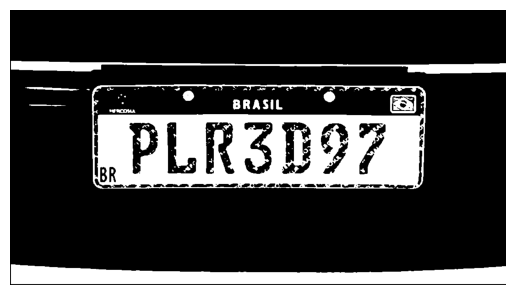

Limit:96.0


In [11]:
# Apply thresh binary with otsu

if image_gray is not None:
    value, lim_otsu = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(lim_otsu, cmap='gray')
    plt.axis('off')
    plt.show()
    print(f'Limit:{value}')

In [12]:
# Trying to identify text

text_first_car = pytesseract.image_to_string(lim_otsu, lang='por')
print(text_first_car)

# Even we treated the image, we still cannot identify text

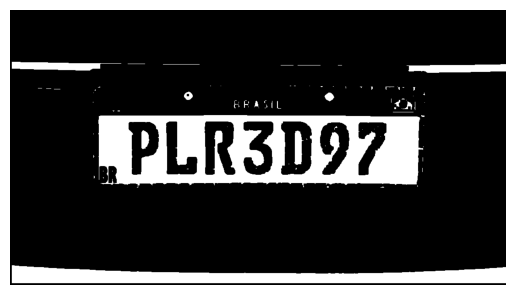

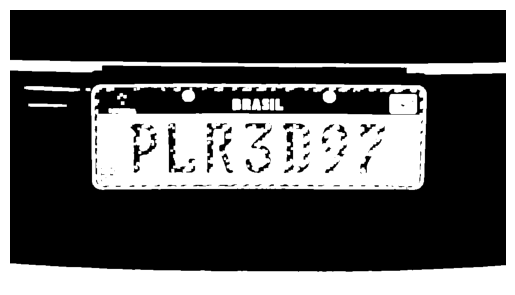

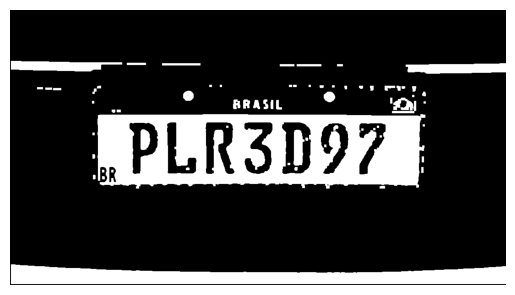

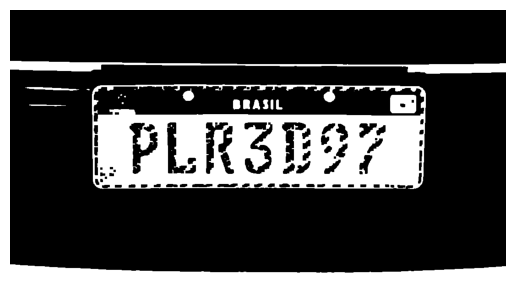

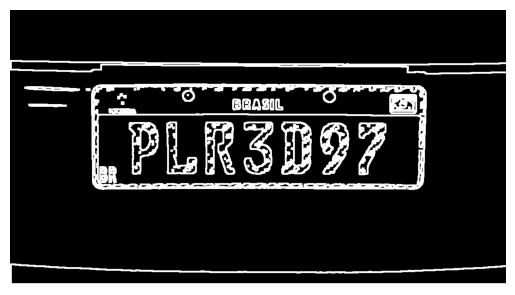

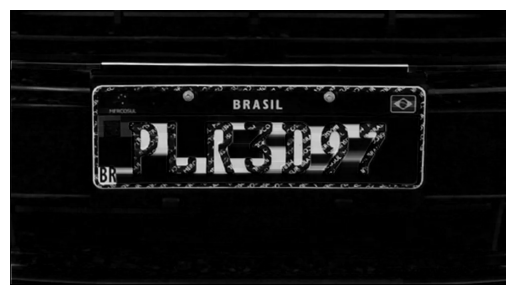

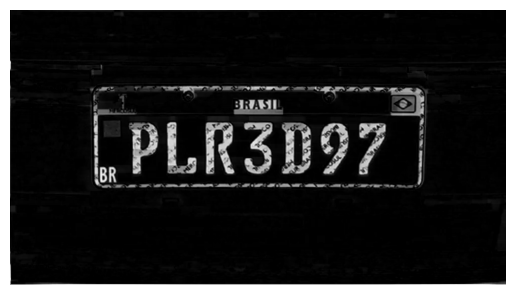

In [13]:
# Morphological Transformations

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# Applying erosion

erosion = cv2.erode(lim_otsu, kernel)

if erosion is not None:
    plt.imshow(erosion, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Applying dilation

dilation = cv2.dilate(lim_otsu, kernel)

if dilation is not None:
    plt.imshow(dilation, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Applying Opening

opening = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)

if opening is not None:
    plt.imshow(opening, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Applying Closing

closing = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)

if closing is not None:
    plt.imshow(closing, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Applying Gradient

gradient = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)

if gradient is not None:
    plt.imshow(gradient, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Creating rectangular kernel

kernel_rectan = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
    
# Applying Top Hat

top_hat = cv2.morphologyEx(image_gray, cv2.MORPH_TOPHAT, kernel_rectan)

if top_hat is not None:
    plt.imshow(top_hat, cmap='gray')
    plt.axis('off')
    plt.show()
    
# Applying Black Hat

black_hat = cv2.morphologyEx(image_gray, cv2.MORPH_BLACKHAT, kernel_rectan)

if black_hat is not None:
    plt.imshow(black_hat, cmap='gray')
    plt.axis('off')
    plt.show()

In [14]:
# Trying to identify text


text = pytesseract.image_to_string(erosion, lang='por', config = '--psm 6')
print(text)

# In this case we are able to identify the text but with some mistakes

| PLRSD97;
(TT



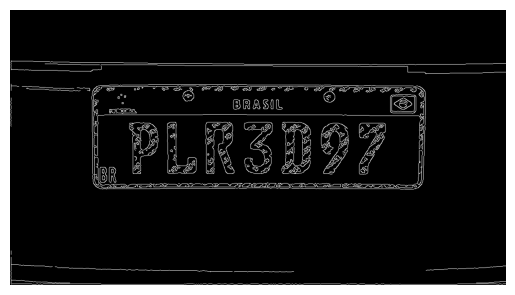

In [15]:
# Detecting image borders and applying canny

borders = cv2.Canny(image_gray, 100, 200)

if borders is not None:
    plt.imshow(borders, cmap='gray')
    plt.axis('off')
    plt.show()

In [16]:
# Finding image contours

contours, hierarchy = cv2.findContours(borders, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [17]:
# Creating script to read plate position

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    aprox = cv2.approxPolyDP(contour, epsilon, True)
    
    # Checking if the polygon is a rectangle
    
    if cv2.isContourConvex(aprox) and len(aprox) == 4:
        local = aprox
        break

local

# Here we can check the 4 positions for the plate

array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [18]:
# Extracting image info

x, y, w, h = cv2.boundingRect(local)
print(x, y, w, h)

180 168 722 224


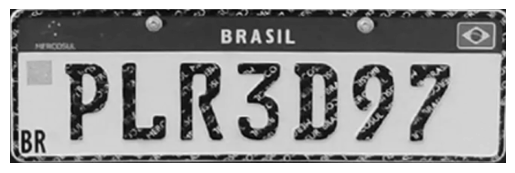

In [19]:
# Filtering original image

plate = image_gray[y:y+h, x: x+w]

if plate is not None:
    plt.imshow(plate, cmap='gray')
    plt.axis('off')
    plt.show()

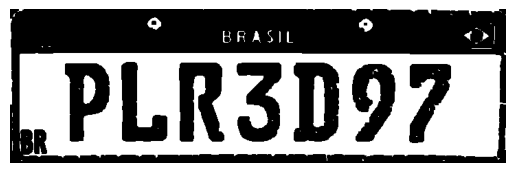

PLR3D97


In [20]:
# Printing image with only plate

if plate is not None:
    
    value, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    erosion = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4,4)))
    
    if erosion is not None:
    
        plt.imshow(erosion, cmap='gray')
        plt.axis('off')
        plt.show()
        text = pytesseract.image_to_string(erosion, lang='por', config = '--psm 6')
        
# Applying regex to avoid future problems

text_extracted = re.search('\w{3}\d{1}\w{1}\d{2}', text)
print(text_extracted.group(0))
        
# Here we can finnaly check the plate without problems

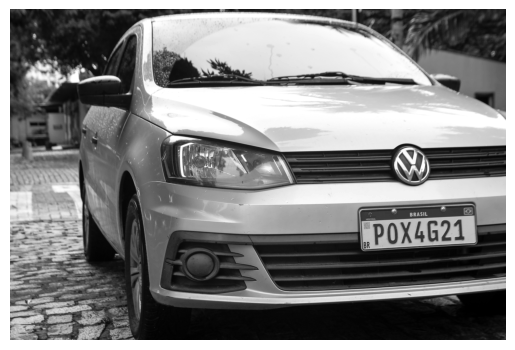

In [21]:
# Applying safe fundaments on other plate

image_second_car = load_image_gray(cv2.imread('Dados/Imagem/carros/placa_carro2.jpg'))

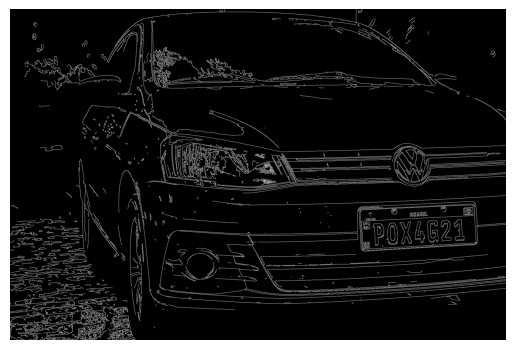

In [22]:
# Applying Canny

borders = cv2.Canny(image_second_car, 100, 200)

if borders is not None:
    plt.imshow(borders, cmap='gray')
    plt.axis('off')
    plt.show()

In [23]:
# Finding image contours

contours, hierarchy = cv2.findContours(borders, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key= cv2.contourArea, reverse = True)[:10]

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    aprox = cv2.approxPolyDP(contour, epsilon, True)
    
    # Checking if the polygon is a rectangle
    
    if cv2.isContourConvex(aprox) and len(aprox) == 4:
        local = aprox
        break

# Checking pixel position

local

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [24]:
# Extracting image info

x, y, w, h = cv2.boundingRect(local)
print(x, y, w, h)

1259 737 401 114


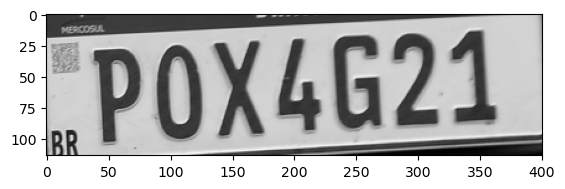

In [25]:
# Checking if the position is the one we want

plate = image_second_car[y:y+h, x:x+w]
plt.imshow(plate, cmap='gray')

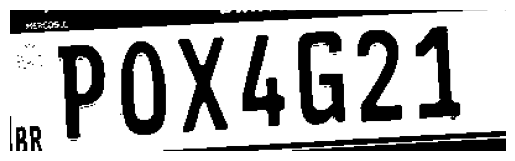

In [26]:
# Applying threshold

value, lim_otsu = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if lim_otsu is not None:
    plt.imshow(lim_otsu, cmap='gray')
    plt.axis('off')
    plt.show()

In [27]:
# Getting text info

text = pytesseract.image_to_string(lim_otsu, lang='por', config = '--psm 6')
text_extracted = re.search('\w{3}\d{1}\w{1}\d{2}', text)
print(text_extracted.group(0))

POX4G24


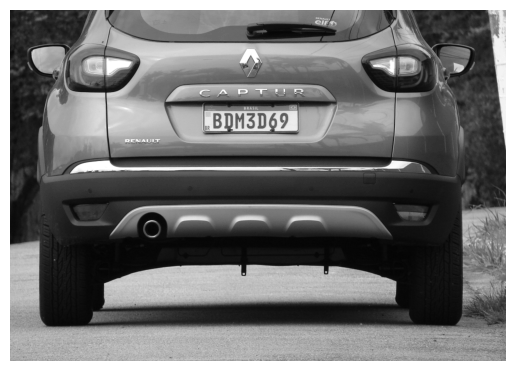

In [28]:
# Testing new image using black hat

image_third_car = load_image_gray(cv2.imread('Dados/Imagem/carros/placa_carro3.jpg'))

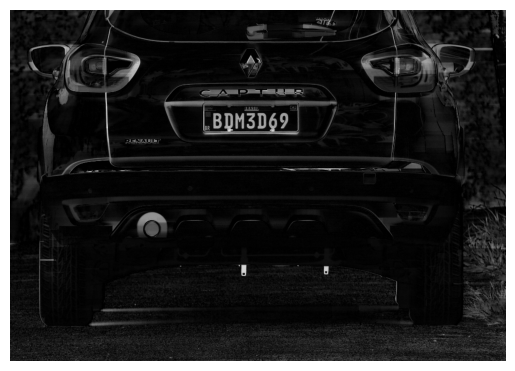

In [29]:
# Applying black hat

kernel_rectan = cv2.getStructuringElement(cv2.MORPH_RECT, (40,13))
black_hat = cv2.morphologyEx(image_third_car, cv2.MORPH_BLACKHAT, kernel_rectan)

if black_hat is not None:
    plt.imshow(black_hat, cmap='gray')
    plt.axis('off')
    plt.show()

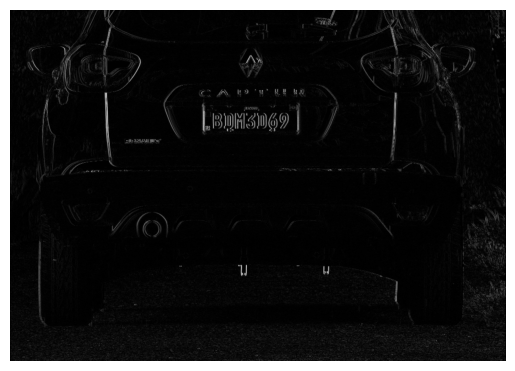

In [30]:
# Applying sobel

sobel_x = cv2.Sobel(black_hat, ddepth=cv2.CV_32F, dx =1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')

if sobel_x is not None:
    plt.imshow(sobel_x, cmap='gray')
    plt.axis('off')
    plt.show()

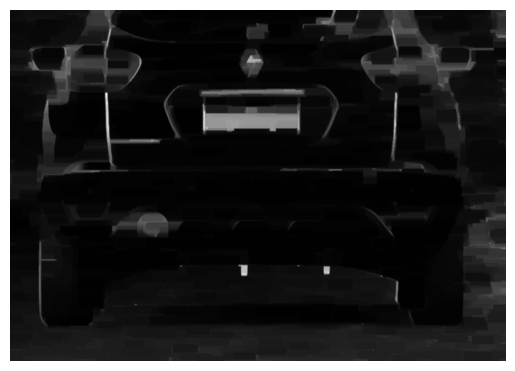

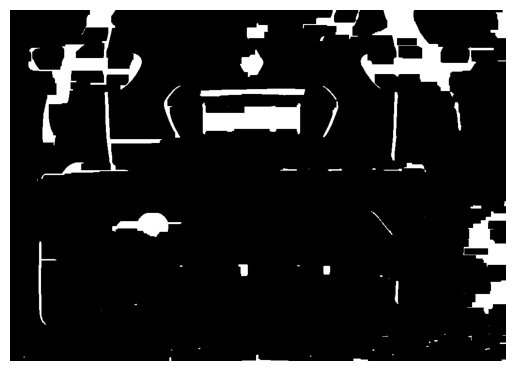

In [31]:
# Applying blur on image

sobel_x = cv2.GaussianBlur(sobel_x, (5,5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_rectan)

if sobel_x is not None:
    plt.imshow(sobel_x, cmap='gray')
    plt.axis('off')
    plt.show()

value, limerization = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if limerization is not None:
    plt.imshow(limerization, cmap='gray')
    plt.axis('off')
    plt.show()

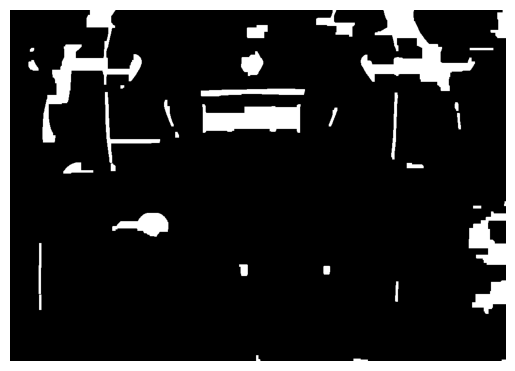

In [32]:
# Applying erosion

kernel_squared = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

limerization = cv2.erode(limerization, kernel_squared, iterations=2)
limerization = cv2.dilate(limerization, kernel_squared, iterations=2)

if limerization is not None:
    plt.imshow(limerization, cmap='gray')
    plt.axis('off')
    plt.show()

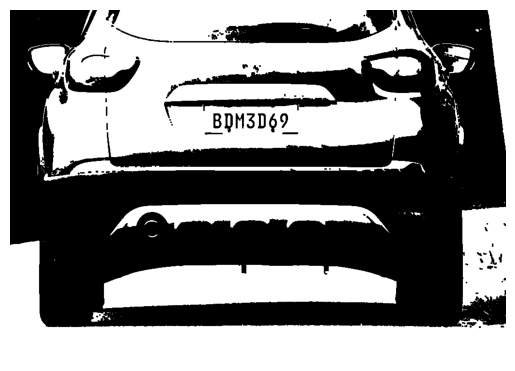

In [33]:
# Applying closing

closing = cv2.morphologyEx(image_third_car, cv2.MORPH_CLOSE, kernel_squared)

# Creating mask

value, mask = cv2.threshold(closing, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

if mask is not None:
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    plt.show()

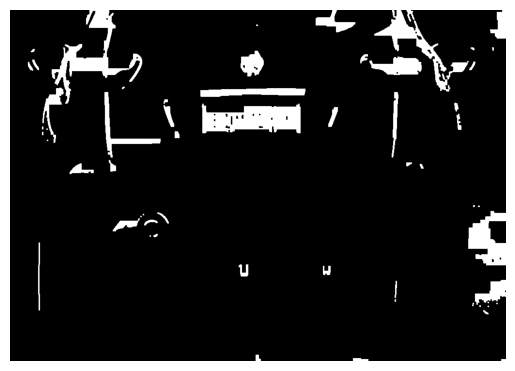

In [34]:
# Applying mask on limeraztion image

limerization = cv2.bitwise_and(limerization, limerization, mask=mask)
limerization = cv2.dilate(limerization, kernel_squared, iterations=2)
limerization = cv2.erode(limerization, kernel_squared)

if limerization is not None:
    plt.imshow(limerization, cmap='gray')
    plt.axis('off')
    plt.show()

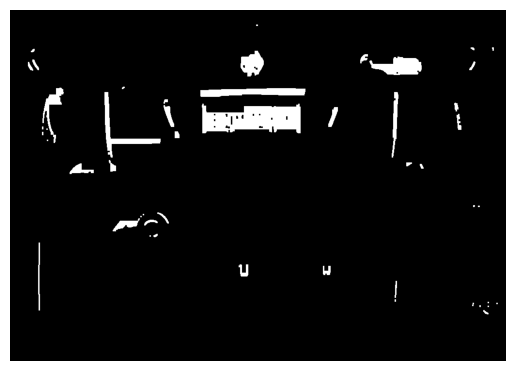

In [35]:
# Applying clear border

limerization = clear_border(limerization)

if limerization is not None:
    plt.imshow(limerization, cmap='gray')
    plt.axis('off')
    plt.show()

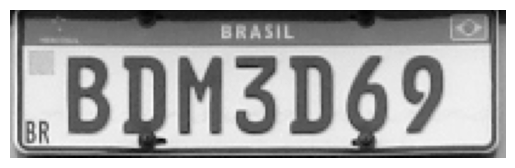

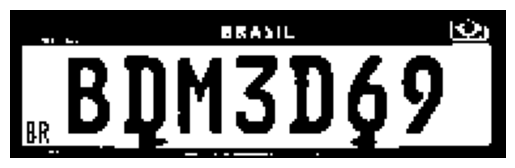

In [36]:
# Finding contours

contours, hierarchy = cv2.findContours(limerization, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


for contour in contours:
    x,y, w, h = cv2.boundingRect(contour)
    proportion = float(w)/h
    if proportion >= 3 and proportion <=3.5:
        plate = image_third_car[y:y+h, x:x+w]
        value, region = cv2.threshold(plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        region = clear_border(region)
        
# Plate image        
        
plt.imshow(plate, cmap='gray')
plt.axis('off')
plt.show()

# Region image

plt.imshow(region, cmap='gray')
plt.axis('off')
plt.show()  

In [37]:
# Getting text

text = pytesseract.image_to_string(region, lang='por', config = '--psm 6')
text_extracted = re.search('\w{3}\d{1}\w{1}\d{2}', text)
print(text_extracted.group(0))

BDM3D69
